In [2]:
# libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('lbp.csv')          # reading the data 
df_dates=pd.to_datetime(df['Date'])  # wea are taking out Date column from the data and storing in df_dates in datetime format.
cols = list(df)[1:10]                # ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']  here xi is ith feature and y is output
df1 = df[cols].astype(float)         # here we are converting all values in the above columns into float values
df1

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.354,0.195,0.103,2.680,0.717,0.218,0.460,1.4,40.1
1,0.622,0.390,0.117,4.680,0.808,0.436,0.613,1.4,40.1
2,0.762,0.427,0.164,5.319,0.904,0.513,0.736,13.6,40.1
3,0.272,0.149,0.087,2.297,0.621,0.126,0.303,42.9,40.1
4,0.379,0.195,0.101,2.363,0.735,0.226,0.482,1.4,40.3
...,...,...,...,...,...,...,...,...,...
107,0.758,0.547,0.351,4.134,0.896,0.553,0.703,139.0,40.2
108,0.209,0.123,0.108,1.579,0.607,0.139,0.312,50.2,39.9
109,0.351,0.227,0.208,3.050,0.736,0.210,0.442,33.5,39.9
110,0.558,0.368,0.277,3.958,0.812,0.455,0.527,31.0,39.9


In [4]:
#reshaping the data
df2=np.array(df1)
data = df2.reshape(28,4,9)
data.shape

(28, 4, 9)

In [5]:
# here i am splitting the data into train and test data
train_data1, test_data1 = train_test_split(data, test_size=0.53, shuffle=False)
train_data1.shape,test_data1.shape

((13, 4, 9), (15, 4, 9))

In [6]:
# seperating input and output of test data and traindata
train_data=train_data1[:,:,:-1]
train_data_o=train_data1[:,-1,-1].reshape(-1,1)
test_data=test_data1[:,:,:-1]
test_data_o=test_data1[:,-1,-1].reshape(-1,1)
train_data.shape,train_data_o.shape,test_data.shape,test_data_o.shape

((13, 4, 8), (13, 1), (15, 4, 8), (15, 1))

In [7]:
#scaling all values in the range 0 to 1.
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 8)).reshape(train_data.shape)
test_data = scaler.fit_transform(test_data.reshape(-1, 8)).reshape(test_data.shape)
train_data_o = scaler.fit_transform(train_data_o)
test_data_o = scaler.fit_transform(test_data_o)
train_data.shape,test_data.shape,train_data_o.shape,test_data_o.shape

((13, 4, 8), (15, 4, 8), (13, 1), (15, 1))

In [8]:
# copying train an test data into another variables.
train_X = train_data[:, :,:]
train_y = train_data_o
test_X = test_data[:, :, :]
test_y = test_data_o

In [9]:
# model.summary()
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')



In [10]:
# Training the model with train data
model.fit(train_X, train_y, epochs=25, batch_size=32, validation_data=(test_X, test_y), verbose=2)
# Make predictions on the test data
predictions = model.predict(test_X)
# predictions

Epoch 1/25
1/1 - 13s - loss: 0.5352 - val_loss: 0.4682 - 13s/epoch - 13s/step
Epoch 2/25
1/1 - 0s - loss: 0.5094 - val_loss: 0.4487 - 66ms/epoch - 66ms/step
Epoch 3/25
1/1 - 0s - loss: 0.4842 - val_loss: 0.4293 - 63ms/epoch - 63ms/step
Epoch 4/25
1/1 - 0s - loss: 0.4593 - val_loss: 0.4099 - 70ms/epoch - 70ms/step
Epoch 5/25
1/1 - 0s - loss: 0.4342 - val_loss: 0.3902 - 63ms/epoch - 63ms/step
Epoch 6/25
1/1 - 0s - loss: 0.4086 - val_loss: 0.3700 - 63ms/epoch - 63ms/step
Epoch 7/25
1/1 - 0s - loss: 0.3822 - val_loss: 0.3491 - 55ms/epoch - 55ms/step
Epoch 8/25
1/1 - 0s - loss: 0.3548 - val_loss: 0.3276 - 70ms/epoch - 70ms/step
Epoch 9/25
1/1 - 0s - loss: 0.3264 - val_loss: 0.3054 - 61ms/epoch - 61ms/step
Epoch 10/25
1/1 - 0s - loss: 0.2970 - val_loss: 0.2828 - 67ms/epoch - 67ms/step
Epoch 11/25
1/1 - 0s - loss: 0.2669 - val_loss: 0.2602 - 62ms/epoch - 62ms/step
Epoch 12/25
1/1 - 0s - loss: 0.2366 - val_loss: 0.2379 - 59ms/epoch - 59ms/step
Epoch 13/25
1/1 - 0s - loss: 0.2067 - val_loss: 0.

In [17]:
test_y_rescale=scaler.inverse_transform(test_y)
predictions_rescale=scaler.inverse_transform(predictions)
predictions_rescale,test_y_rescale

(array([[40.07957 ],
        [40.079823],
        [40.08248 ],
        [40.085155],
        [40.085197],
        [40.08899 ],
        [40.08464 ],
        [40.083874],
        [40.086838],
        [40.085056],
        [40.09896 ],
        [40.090614],
        [40.095238],
        [40.086708],
        [40.083145]], dtype=float32),
 array([[40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9]]))

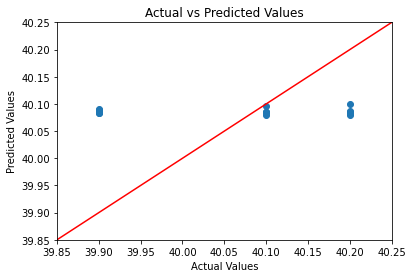

MSE:  0.01593812324747018
RMSE:  0.1262462801331991


In [18]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(test_y_rescale,predictions_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse = mean_squared_error(test_y_rescale,predictions_rescale)
rmse = np.sqrt(mse)
print("MSE: ",  mse)
print("RMSE: ", rmse)

In [19]:
train_X.shape,test_X.shape
test_all_input_X = np.concatenate([train_X,test_X])
test_all_input_y = np.concatenate([train_y,test_y])
test_all_input_X.shape,test_all_input_y.shape

((28, 4, 8), (28, 1))

In [20]:
p1 = model.predict(test_all_input_X)

1/1 [==============================] - 0s 46ms/step


In [21]:
t1_rescale=scaler.inverse_transform(test_all_input_y)
p1_rescale=scaler.inverse_transform(p1)
# p1_rescale,t1_rescale

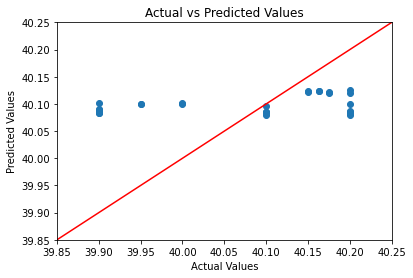

MSE:  0.013126930949636104
RMSE:  0.11457281941907559


In [22]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(t1_rescale,p1_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse1 = mean_squared_error(t1_rescale,p1_rescale)
rmse1 = np.sqrt(mse1)
print("MSE: ",  mse1)
print("RMSE: ", rmse1)